# Solving Systems of Ordinary Differential Equations

## Import Libraries

In [30]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy as sp 
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


## Section 1/: Damped Pendulum using function odeint()

The example that follows was taken from the [numpy manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint). 

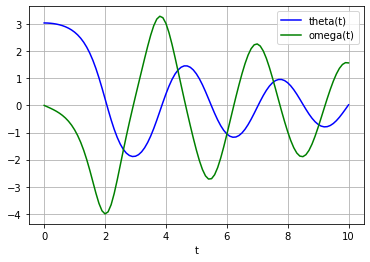

In [31]:
#..set rhs-function of ODE system 
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

#..set parameter values 
b=.25; c= 5.0;

#..set initial conditions 
y0 = [np.pi - 0.1, 0.0];

#..set time interval 
tvec = np.linspace(0, 10, 101);

#..solve ODE systemk 
sol = odeint(pend, y0, tvec, args=(b, c), full_output=1, printmessg=0);

#..plot solution obtained 
plt.plot(t, sol[0][:, 0], 'b', label='theta(t)')
plt.plot(t, sol[0][:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Section 2:/ Example of passing arguments to ODE solver using function odeint()
Here we prepare for solving an optimization problem.

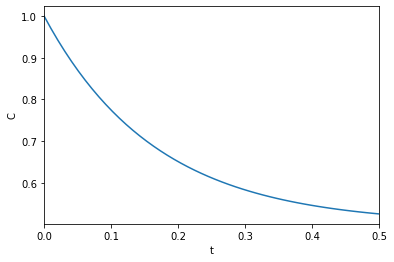

In [32]:
Ca0 = 1.0
k1 = k_1 = 3.0

tvec = np.linspace(0, 0.5)

def C(K):
    k1, k_1 = K
    def dCdt(Ca, t, k1, k_1):
        return -k1 * Ca + k_1 * (Ca0 - Ca)
    sol = odeint(dCdt, Ca0, tspan, tuple((k1, k_1)))
    return sol

plt.plot(tspan, C([k1, k_1]))
plt.xlim([tspan.min(), tspan.max()])
plt.xlabel('t')
plt.ylabel('C');

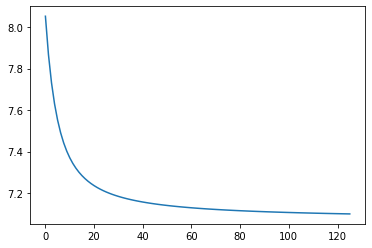

In [44]:
bnominal = .25 
bmin = bnominal/2; bmax = 500*bnominal; 
N = 100; bstep = (bmax-bmin)/N
bvec = np.linspace(bmin, bmax, num=N+1)
target = np.ones(np.size(tvec))
costfvec = np.zeros(N+1) 
for i in range(N+1): 
    sol = odeint(pend, y0, tvec, args=(bvec[i], c), full_output=1, printmessg=0);
    mismatch = sol[0][:,1] - target
    costfvec[i] = sp.linalg.norm(mismatch)

plt.plot(bvec, costfvec)    